In [1]:
import numpy as np
import pandas as pd
from BorutaShap import BorutaShap

import re, os

In [2]:
df = pd.read_csv("troponin_pod1_regression_input.csv")
for i, col in enumerate(df.columns) :
    if df[df[col].isnull()].shape[0] > 0 :
        df[col] = df[col].fillna(df[col].mode()[0])

In [3]:
continuous_vars = ['Age',  'Ht', 'Wt', 'BMI', 'Cr_MELD', 
                   'Na_MELD', 'MELD', 'postHD', 'preHD',
                   'Alb', 'GFR_MDRD', 'Cys_C_GFR', 'Low_opHct',
                   'CIT', 'WIT', 'GRWR', 'Crystalloid',
                   'Colloid', 'UO', 'RBC', 'FFP', ' Cryo',
                   'Epi_mcg', 'Intraop_Steroid', 'Cr',
                   'Cr_prean', 'Cr_anhe', 'Tnl_ind', 
                   'Tnl_anhe', 'Tnl_reperfusion', 'HR_mean7', 
                   'SBP_mean7', 'DBP_mean7',#  'TnI_pod1', 'opBgn2Reperf_hr', 'Reperf2opTer_hr', 
                   'anes_dur_hr']

In [4]:
X = df.drop(columns=['TnI_pod1'])
Y = df['TnI_pod1']

#### Shap regression

In [5]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=Y, n_trials=100, random_state=0)

100%|██████████| 100/100 [43:33<00:00, 26.14s/it] 

4 attributes confirmed important: ['Tnl_reperfusion', 'Intraop_Steroid', 'BMI', 'Cr_prean']
98 attributes confirmed unimportant: ['Loc', 'Pneumonia', 'Bacteremia', 'preHD', ' Cryo', 'PVS', 'Crystalloid', 'Age', 'AntiCoa', 'Cr_anhe', 'BBB', 'DBP_mean7', 'Wt', 'CIT', 'PVT', 'PC', 'preVent', 'op_mon', 'HBV', 'MELD', 'Statin', 'op_ter_hr', 'Biopump', 'op_bgn_hr', 'Toxic', 'UO', 'Room', 'Cr_MELD', 'HCV', 'Alc', 'Splenoportography_intraop', 'Tnl_ind', 'SBP_mean7', 'WIT', 'CAD', 'Colloid', 'Portography_intraop', 'ACEI_ARB', 'CCB', 'Mental', 'CHF', 'Ht', 'Na_MELD', 'CVA', 'op_Epi', 'Others', 'FHF', 'Aldactone', 'Low_opHct', 'Levo_mcg', 'HCC', 'Sepsis', 'anes_dur_hr', 'PRS', 'embolization_intraop', 'Lasix', 'SBP_abd', 'op_Terli', 'HR_mean7', 'IntractableAscites', 'HTN', 'Tnl_anhe', 'Alb', 'Epi_OX', 'HEP', 'Pre_Norepinephrine', 'Sex', 'DM_Tx', 'AP', 'Biliary', 'Aspirin', 'RCRI', 'op_yr', 'Organism', 'op_Dobu', 'Reperf2opTer_hr', 'FFP', 'op_Iso', 'Cr_pod', 'Cholangiography_intraop', 'BB', 'Liver_

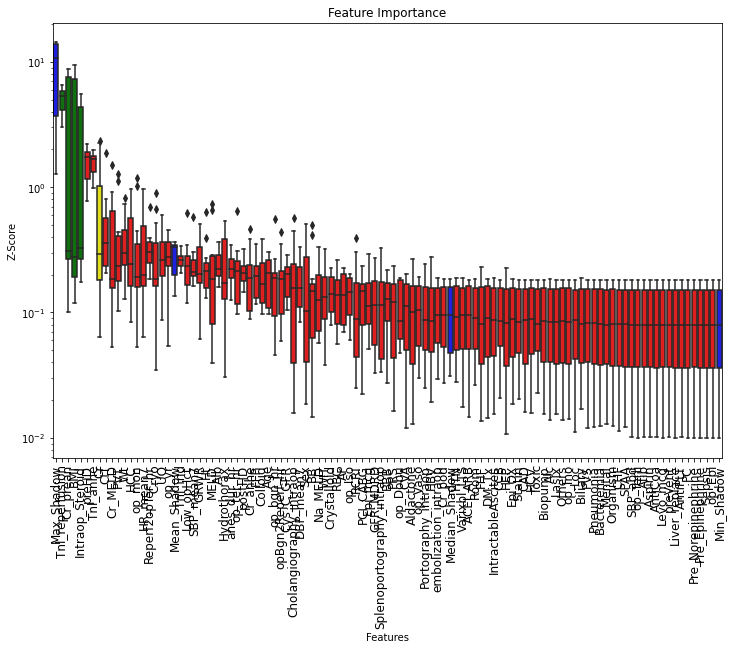

In [6]:
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

#### Gini regression

In [7]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='gini',
                              classification=False)

Feature_Selector.fit(X=X, y=Y, n_trials=100, random_state=0)

100%|██████████| 100/100 [01:21<00:00,  1.23it/s]

4 attributes confirmed important: ['Tnl_reperfusion', 'preHD', 'BMI', 'Intraop_Steroid']
99 attributes confirmed unimportant: ['Loc', 'Pneumonia', 'Bacteremia', ' Cryo', 'PVS', 'Crystalloid', 'Age', 'AntiCoa', 'Cr_anhe', 'BBB', 'DBP_mean7', 'Wt', 'CIT', 'PVT', 'PC', 'preVent', 'op_mon', 'HBV', 'MELD', 'Statin', 'op_ter_hr', 'Biopump', 'op_bgn_hr', 'Toxic', 'UO', 'Room', 'Cr_MELD', 'HCV', 'Alc', 'Splenoportography_intraop', 'Tnl_ind', 'SBP_mean7', 'WIT', 'CAD', 'Colloid', 'Portography_intraop', 'ACEI_ARB', 'CCB', 'Mental', 'CHF', 'Ht', 'Na_MELD', 'CVA', 'op_Epi', 'Others', 'FHF', 'Aldactone', 'Low_opHct', 'Levo_mcg', 'HCC', 'Sepsis', 'anes_dur_hr', 'PRS', 'embolization_intraop', 'Lasix', 'SBP_abd', 'op_Terli', 'Cr', 'HR_mean7', 'IntractableAscites', 'HTN', 'Tnl_anhe', 'Alb', 'Epi_OX', 'HEP', 'Pre_Norepinephrine', 'Sex', 'Cr_prean', 'DM_Tx', 'AP', 'Biliary', 'Aspirin', 'RCRI', 'op_yr', 'Organism', 'op_Dobu', 'Reperf2opTer_hr', 'FFP', 'op_Iso', 'Cr_pod', 'Cholangiography_intraop', 'BB', '

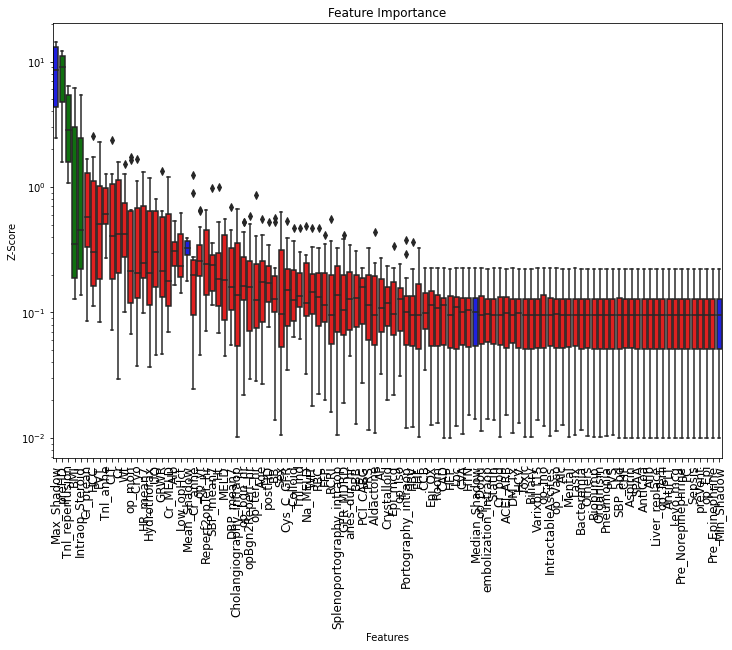

In [8]:
# Returns Boxplot of features
# I would recommend plotting Y axis on the Log Scale
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')


#### Shap regression with sampling

In [9]:
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=Y, n_trials=100, random_state=0, sample=True)

100%|██████████| 100/100 [05:02<00:00,  3.03s/it]

4 attributes confirmed important: ['Tnl_reperfusion', 'Intraop_Steroid', 'BMI', 'Cr_prean']
99 attributes confirmed unimportant: ['Loc', 'Pneumonia', 'Bacteremia', 'preHD', ' Cryo', 'PVS', 'Crystalloid', 'Age', 'AntiCoa', 'Cr_anhe', 'BBB', 'DBP_mean7', 'Wt', 'CIT', 'PVT', 'PC', 'preVent', 'op_mon', 'HBV', 'MELD', 'Statin', 'op_ter_hr', 'Biopump', 'op_bgn_hr', 'Toxic', 'UO', 'Room', 'Cr_MELD', 'HCV', 'Alc', 'Splenoportography_intraop', 'Tnl_ind', 'SBP_mean7', 'WIT', 'CAD', 'Colloid', 'Portography_intraop', 'ACEI_ARB', 'CCB', 'Mental', 'CHF', 'Ht', 'Na_MELD', 'CVA', 'op_Epi', 'Others', 'FHF', 'Aldactone', 'Low_opHct', 'Levo_mcg', 'HCC', 'Sepsis', 'anes_dur_hr', 'PRS', 'embolization_intraop', 'Lasix', 'SBP_abd', 'op_Terli', 'Cr', 'HR_mean7', 'IntractableAscites', 'HTN', 'Tnl_anhe', 'Alb', 'Epi_OX', 'HEP', 'Pre_Norepinephrine', 'Sex', 'DM_Tx', 'AP', 'Biliary', 'Aspirin', 'RCRI', 'op_yr', 'Organism', 'op_Dobu', 'Reperf2opTer_hr', 'FFP', 'op_Iso', 'Cr_pod', 'Cholangiography_intraop', 'BB', '

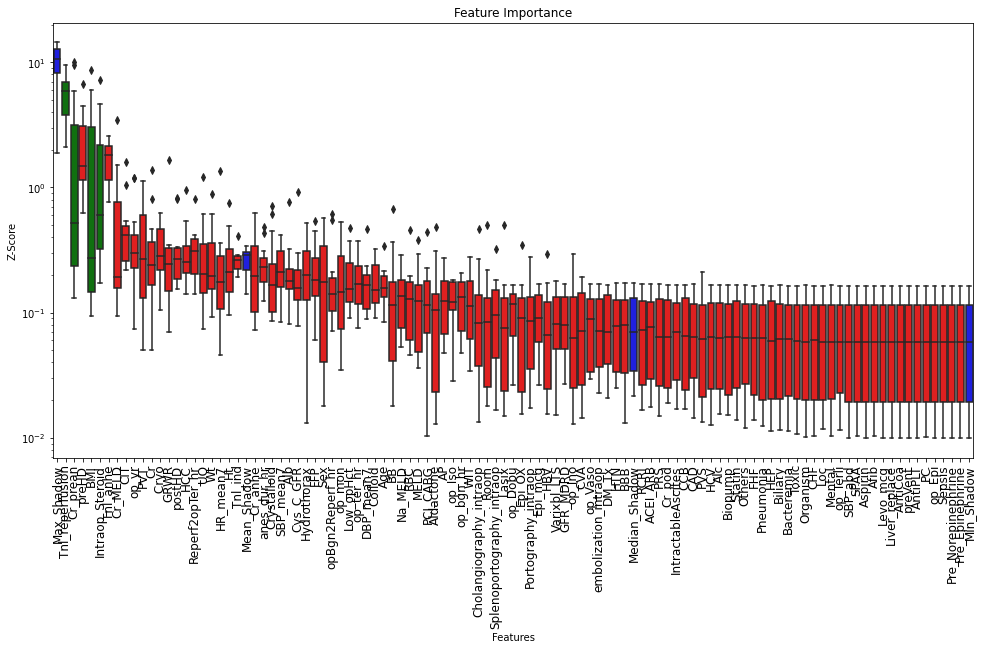

In [11]:
# Returns Boxplot of features
# I would recommend plotting Y axis on the Log Scale
Feature_Selector.plot(X_size=12, figsize=(16.5,8),
            y_scale='log', which_features='all')